# Lead Scoring Case Study


#### Objective: 
- 'X Education', an education complany sells online courses to industry professionals and market its courses through several medium. The people who enter the company's website and fill a form are termed as a lead, to which the sales person try to convert by connecting to them.
- However, current conversion rate is only 30%. The company wants to increase it by identifying 'Hot Leads' and try to focus more on them. We need to build a model that assigns a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the one's with lower lead score have a lower conversion chance. The target lead conversion rate tis expected to be around 80%.

### Importing & inspecting data set

In [1]:
#importing required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows',80)
pd.set_option('display.max_columns',90)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics  # for confusion matrix, accuracy, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# uploading data set
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# dataframe shape
df.shape

(9240, 37)

In [4]:
# dataframe structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Data type looks good for all the attributes
- 7 numerical and 30 categorical columns

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 - Probablity of outliers in : 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' (sudden change from 75% to max)
 - 'Lead Number' & 'Converted' can be ignored as they don't describe any numerical implications.

### Data Understanding - EDA

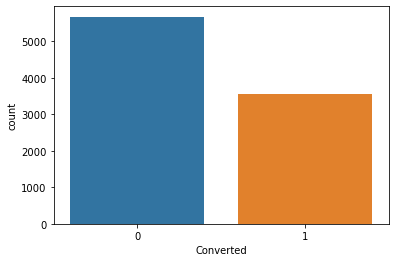

In [6]:
# Target variable analysis
sns.countplot(df['Converted'])
plt.show()

- Not converted Customers are alomst 60% more than the converted ones

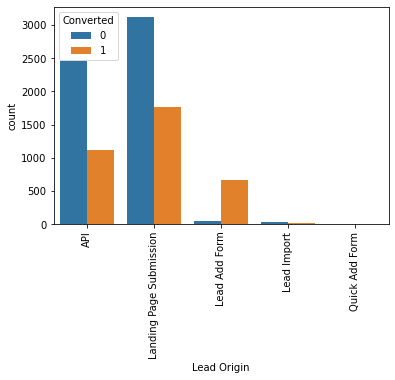

In [7]:
# Lead Origin

sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

- The leads originated from the 'Add Form' have very high rate of conversion compared to others.
- Leads from 'API' & 'Landing page' are OK, but from 'Import' is insignificantly low.

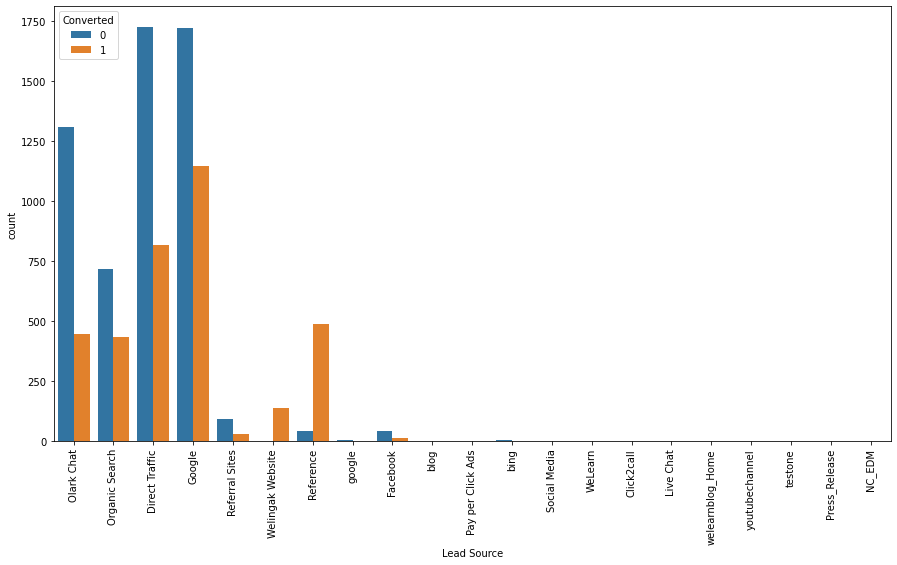

In [8]:
# Lead Source

plt.figure(figsize=(15,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

In [9]:
# replacing 'google' to 'Google' to merge common data under same heading
df['Lead Source'].replace('google','Google',inplace=True)

In [10]:
# merging insignificantly low value categories into 'Others'
df['Lead Source'].replace(['blog','Pay per Click Ads','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home',
                          'youtubechannel','testone','Press_Release','NC_EDM'],'Others',inplace=True)

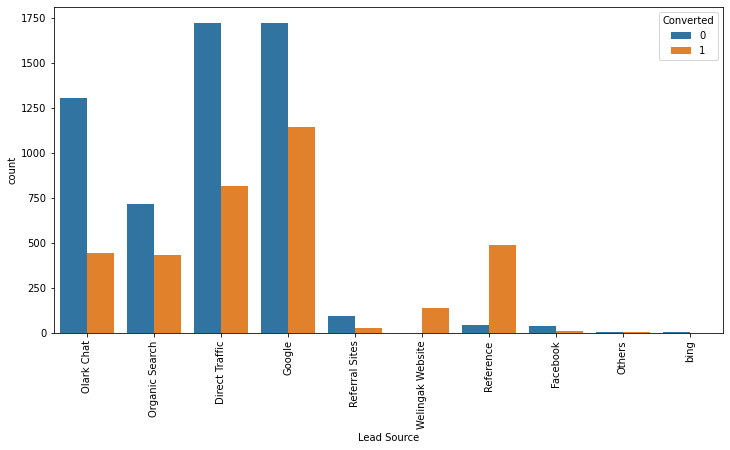

In [11]:
# re-plotting
plt.figure(figsize=(12,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

- Leads from 'Reference' & 'Welingak Website' are highly convertible
- Leads from  'Organic Search', 'Google' are Good and shows sign of betterment.
- Leads from 'Olark Chat', 'Direct Traffic' are OK however can be improved
- Leads from other fields should be worked upon for enhancement. 

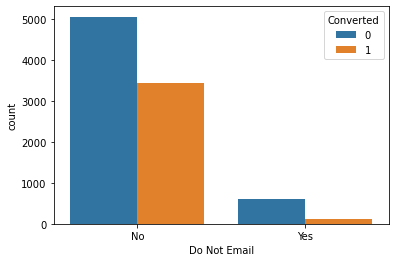

In [12]:
# Do Not Email

sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
plt.show()

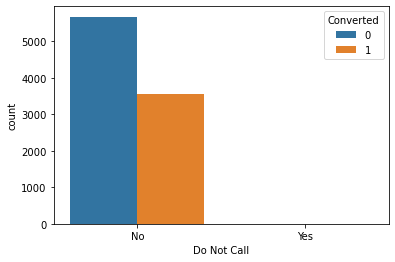

In [13]:
# Do Not Call

sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
plt.show()

- This column highly skewed towards 'No'.

In [14]:
# Dropping 'DO NOT CALL' due to skewness

df.drop('Do Not Call',axis=1,inplace=True)

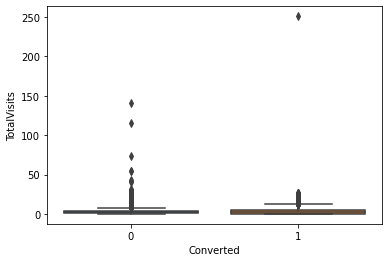

In [15]:
# TotalVisits

sns.boxplot(x=df['Converted'],y=df['TotalVisits'])
plt.show()

- Outliers hindering interpretability. Lets treat outliers

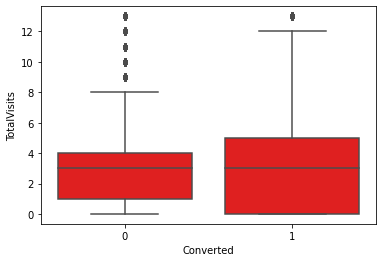

In [16]:
# handelling 'TotalVisits' Outliers - will use soft capping

q1 = df['TotalVisits'].quantile(0.02)
q4 = df['TotalVisits'].quantile(0.98)
df['TotalVisits'][df['TotalVisits']<=q1] = q1
df['TotalVisits'][df['TotalVisits']>=q4] = q4

sns.boxplot(x=df['Converted'],y=df['TotalVisits'],color='r')
plt.show()

- Median is similar for both conversion labels.

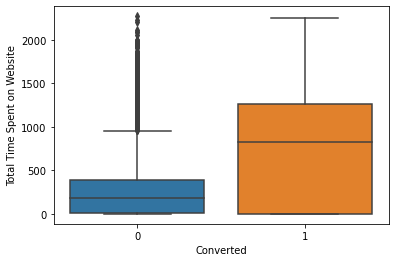

In [17]:
# Total Time Spent on Website

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df)

- Converted customers spend more time (median ~900) on website compared to non converting ones (median ~250). More useful and customized content should be cattered to gain more conversions.

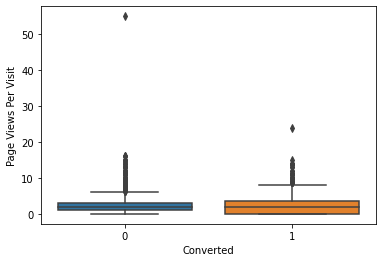

In [18]:
# Page Views Per Visit

sns.boxplot(x='Converted', y='Page Views Per Visit', data=df)

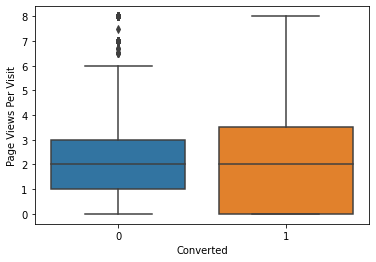

In [19]:
# handelling 'Page Views Per Visit' Outliers - will use soft capping

q1 = df['Page Views Per Visit'].quantile(0.02)
q4 = df['Page Views Per Visit'].quantile(0.98)
df['Page Views Per Visit'][df['Page Views Per Visit']<=q1] = q1
df['Page Views Per Visit'][df['Page Views Per Visit']>=q4] = q4

sns.boxplot(x=df['Converted'],y=df['Page Views Per Visit'])
plt.show()

- Median is similar for both Converted labels. Not much information derived.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

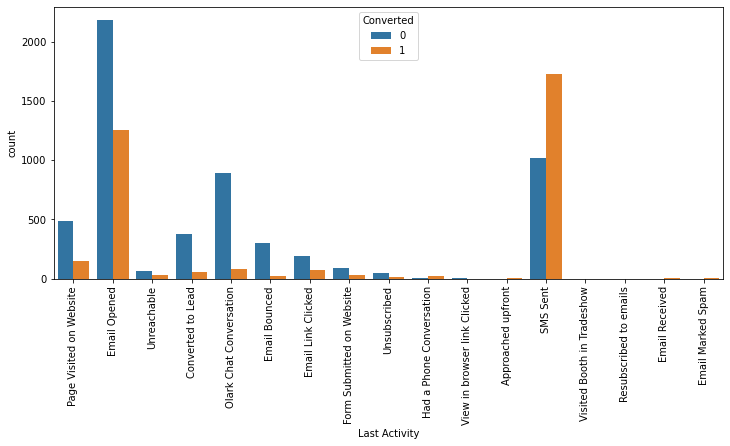

In [20]:
# Last Activity

plt.figure(figsize=(12,5))
sns.countplot('Last Activity', hue='Converted',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

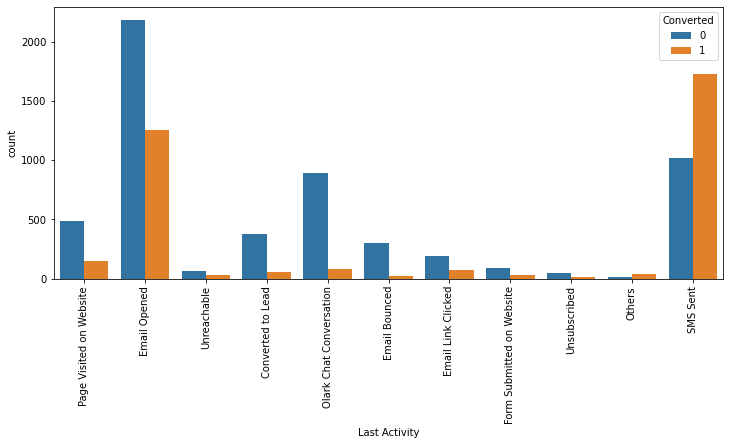

In [21]:
# merging insignificantly low value categories into 'Others'
df['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Visited Booth in Tradeshow',
                             'Resubscribed to emails','Email Received','Email Marked Spam','Had a Phone Conversation'],'Others',inplace=True)

# re-plotting
plt.figure(figsize=(12,5))
sns.countplot('Last Activity', hue='Converted',data=df)
plt.xticks(rotation=90)

- Having sent an SMS at last moment (as last resort) had often turned out custmer beig converted (SMS being read;y accessible)
- Mostly mails were sent which received OK conversion rate.
- In 'Others' specifically ' Had a Phone Conversation' seems to have converted customers, however it's not attempted much by sales team. It should be focused more on.

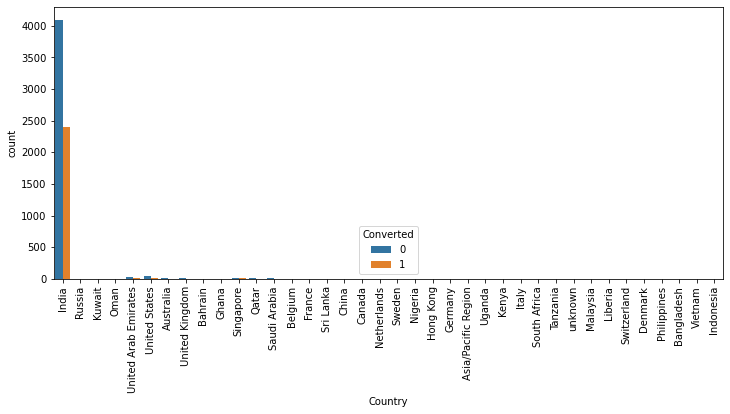

In [22]:
# Country

plt.figure(figsize=(12,5))
sns.countplot('Country', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- Most customers are from 'India' hence its highly skewed towards it.

In [23]:
# Dropping 'COUNTRY' due to skewness

df.drop('Country',axis=1,inplace=True)

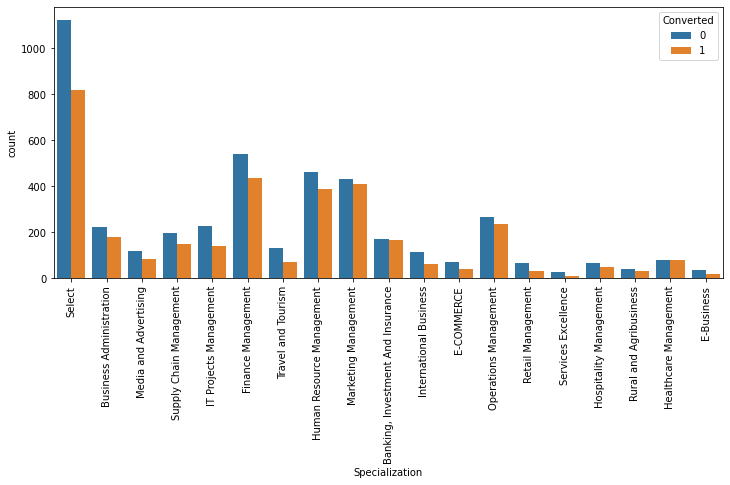

In [24]:
# Specialization

plt.figure(figsize=(12,5))
sns.countplot('Specialization', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- 'Select' column is equivalent to null value. Thus, this should be treated with appropriatly during data preparation & missing values treatment.
- Most conversions are from Unidentified sectors (null value) and recognized sectors like Healthcare Mgmt, Banking, Insurance & Investment, Marketing Mgmt.
- Almost all sectors have shown reasonable conversion and should thus be equally pormoted well.

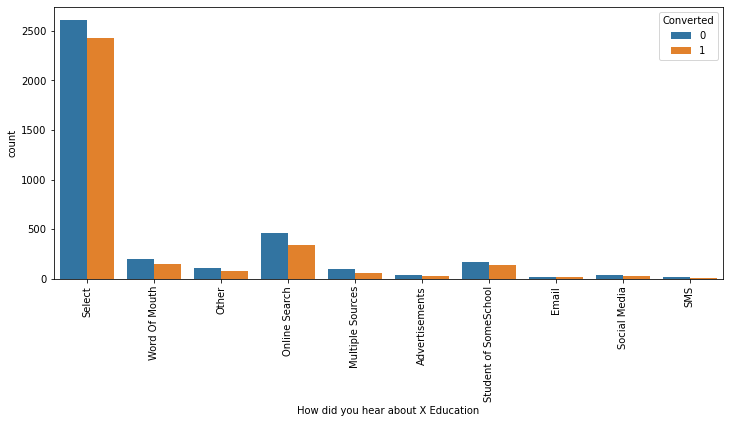

In [25]:
# How did you hear about X Education

plt.figure(figsize=(12,5))
sns.countplot('How did you hear about X Education', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- 'Select' column is equivalent to null value. Thus, this should be treated with appropriatly during data preparation & missing values treatment.
- Most conversions have been observed from unidentified categories.

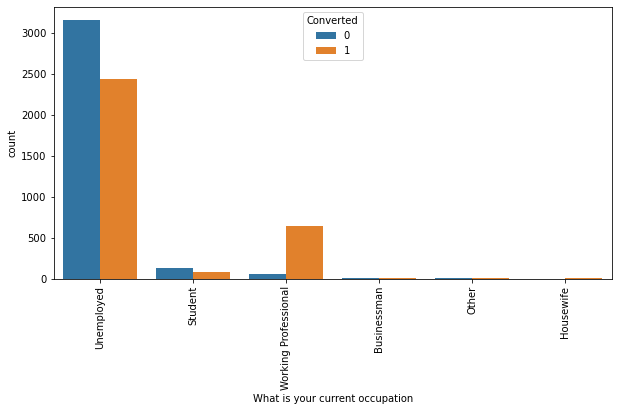

In [26]:
# What is your current occupation

plt.figure(figsize=(10,5))
sns.countplot('What is your current occupation', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- Working Professionals are highly likely to convert.
- Unemployed personnals are also prone to conversion and should be focused well upon.

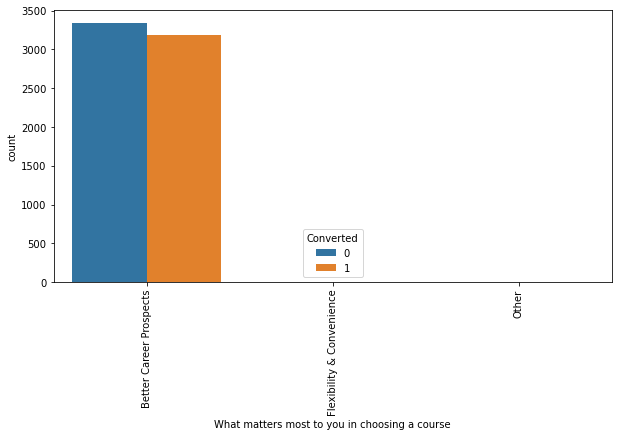

In [27]:
# What matters most to you in choosing a course

plt.figure(figsize=(10,5))
sns.countplot('What matters most to you in choosing a course', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- highly skewed towards 'Better Career Prospects.

In [28]:
# Dropping 'What matters most to you in choosing a course' due to skewness

df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

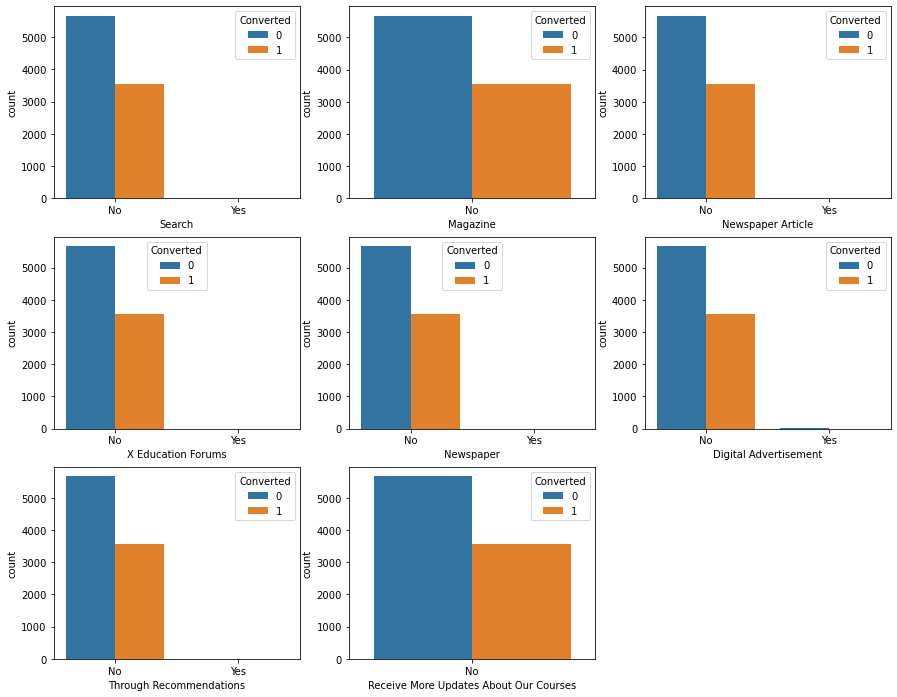

In [29]:
# Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations
# & Receive More Updates About Our Courses

plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.countplot('Search', hue='Converted',data=df)
plt.subplot(3,3,2)
sns.countplot('Magazine', hue='Converted',data=df)
plt.subplot(3,3,3)
sns.countplot('Newspaper Article', hue='Converted',data=df)
plt.subplot(3,3,4)
sns.countplot('X Education Forums', hue='Converted',data=df)
plt.subplot(3,3,5)
sns.countplot('Newspaper', hue='Converted',data=df)
plt.subplot(3,3,6)
sns.countplot('Digital Advertisement', hue='Converted',data=df)
plt.subplot(3,3,7)
sns.countplot('Through Recommendations', hue='Converted',data=df)
plt.subplot(3,3,8)
sns.countplot('Receive More Updates About Our Courses', hue='Converted',data=df)

plt.show()

- All are either highly skewed towards 'No' or only have one category 'No'

In [30]:
# Dropping [Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations
# & Receive More Updates About Our Courses] due to skewness

df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
        'Through Recommendations','Receive More Updates About Our Courses'],axis=1,inplace=True)

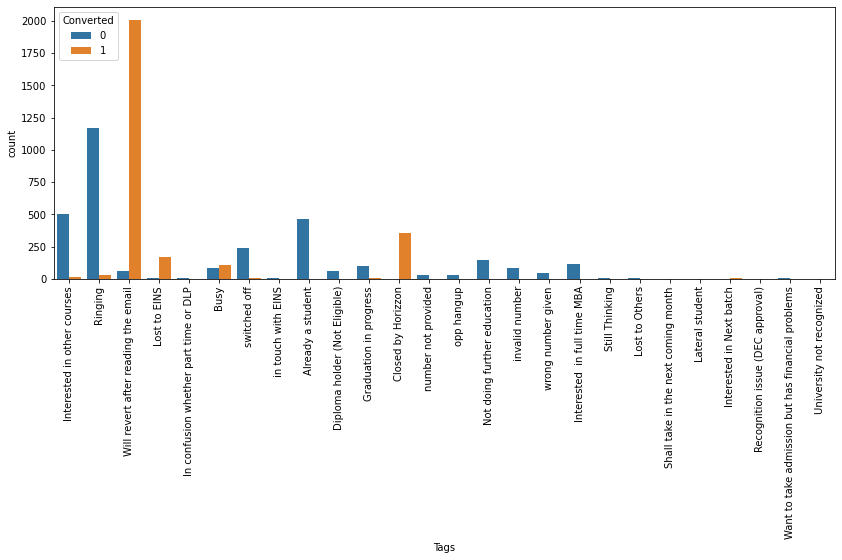

In [31]:
# Tags

plt.figure(figsize=(14,5))
sns.countplot('Tags', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

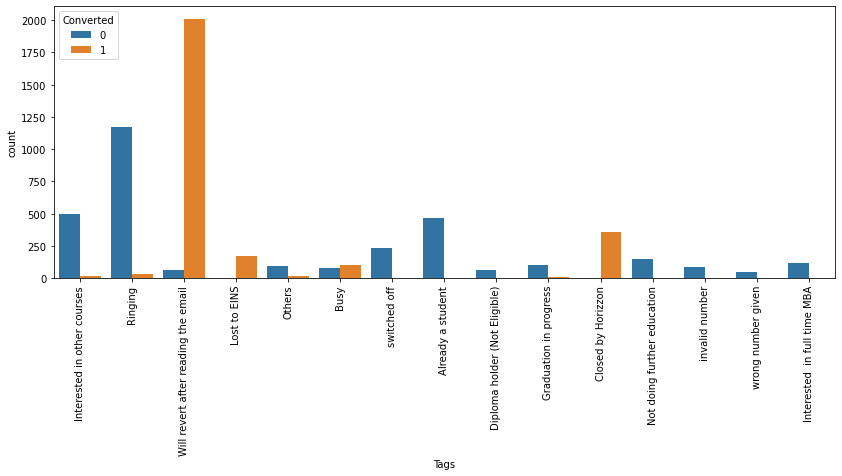

In [32]:
# Collaborating insignificantly low value categories int a single label 'Others'
df['Tags']=df['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Still Thinking','Lost to Others',
                               'Shall take in the next coming month','Lateral student','Interested in Next batch',
                               'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                               'University not recognized','number not provided','opp hangup'], 'Others')
# re-plotting
plt.figure(figsize=(14,5))
sns.countplot('Tags', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- Will revert after reading the email, Closed by Horizon are two of the highest grossing conversions.
- 'Lost to EINS', 'Busy' are few other Tags with positive conversion rate.
- Following Tags showed 0 conversion and should be least prioritized: switched off, Already a student, Diploma holder (Not Eligible), Graduation in progress, Not doing further education, invalid number, wrong number given, Interested in full time MBA

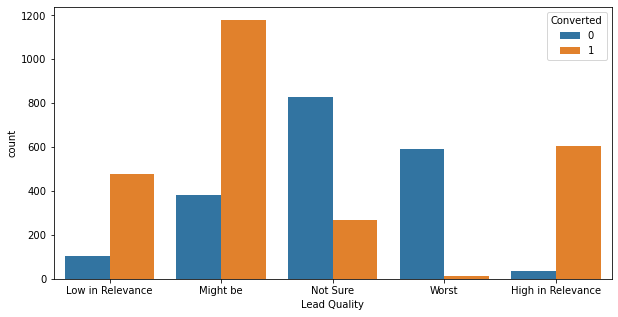

In [33]:
# Lead Quality

plt.figure(figsize=(10,5))
sns.countplot('Lead Quality', hue='Converted',data=df)
plt.show()

- 'High in Relevance' & 'Might be' are very likely to Convert as tagged correctly.
- 'Worst' will very likely not Convert. Again correctly tagged.
- 'Low in Relevance' Converted way more than expectations as per tag.

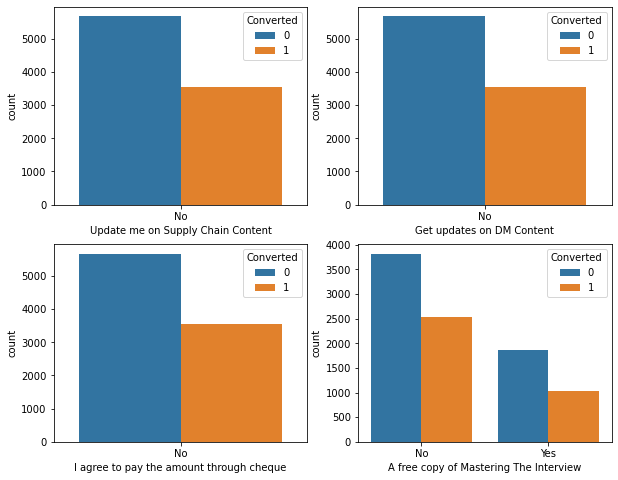

In [34]:
# Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot('Update me on Supply Chain Content', hue='Converted',data=df)
plt.subplot(2,2,2)
sns.countplot('Get updates on DM Content', hue='Converted',data=df)
plt.subplot(2,2,3)
sns.countplot('I agree to pay the amount through cheque', hue='Converted',data=df)
plt.subplot(2,2,4)
sns.countplot('A free copy of Mastering The Interview', hue='Converted',data=df)

plt.show()

- Following columns onlt have single category 'No' : Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque

In [35]:
# Dropping [Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque] due to skewness

df.drop(['Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
         ],axis=1,inplace=True)

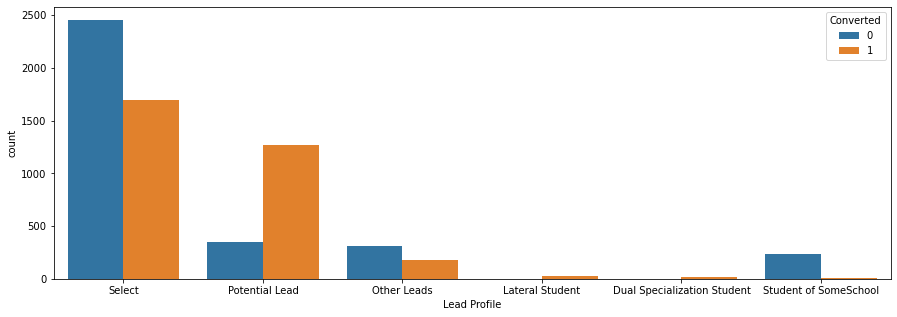

In [36]:
# Lead Profile

plt.figure(figsize=(15,5))
sns.countplot('Lead Profile', hue='Converted',data=df)
plt.show()

- 'Select' column is equivalent to null value. Thus, this should be treated with appropriatly during data preparation & missing values treatment.
- 'Potential Lead' stands true to its label and is highly likely to Convert.

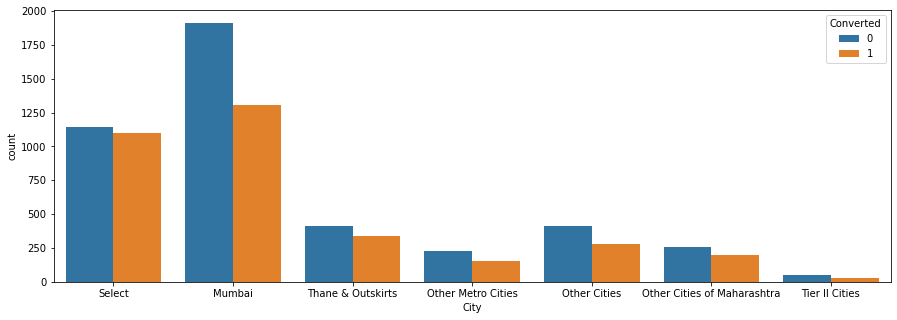

In [37]:
# City

plt.figure(figsize=(15,5))
sns.countplot('City', hue='Converted',data=df)
plt.show()

- 'Select' column is equivalent to null value. Thus, this should be treated with appropriatly during data preparation & missing values treatment.
- Most responses and conversions from Mumbai alone.
- Almost similar conversion ratio across remaining regions.

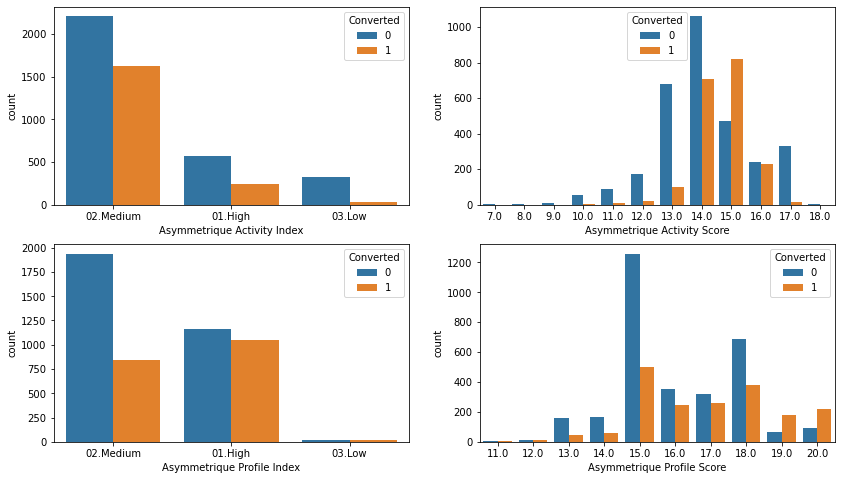

In [38]:
# Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.countplot('Asymmetrique Activity Index', hue='Converted',data=df)
plt.subplot(2,2,2)
sns.countplot('Asymmetrique Activity Score', hue='Converted',data=df)
plt.subplot(2,2,3)
sns.countplot('Asymmetrique Profile Index', hue='Converted',data=df)
plt.subplot(2,2,4)
sns.countplot('Asymmetrique Profile Score', hue='Converted',data=df)

plt.show()

- Higher frequency & Conversions with Medium 'Activity Index' with score ranging between 13-15. 
- Higher frequency with Medium 'Profile Index' with score ranging between 15-17
- Higher Conversion with High 'Profile Index' with score ranging between 17-20

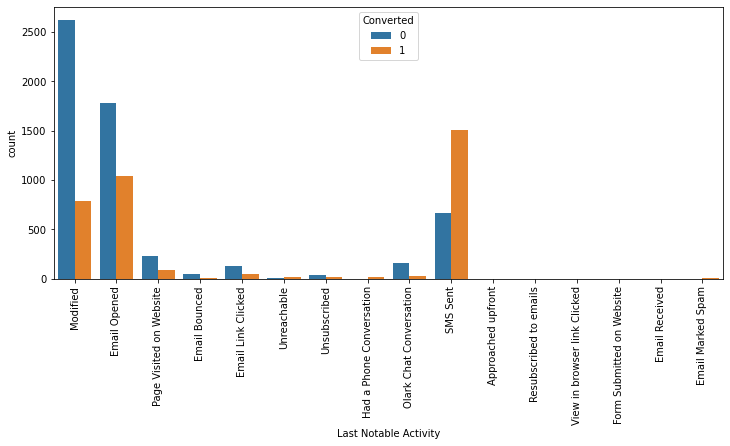

In [39]:
# Last Notable Activity

plt.figure(figsize=(12,5))
sns.countplot('Last Notable Activity', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

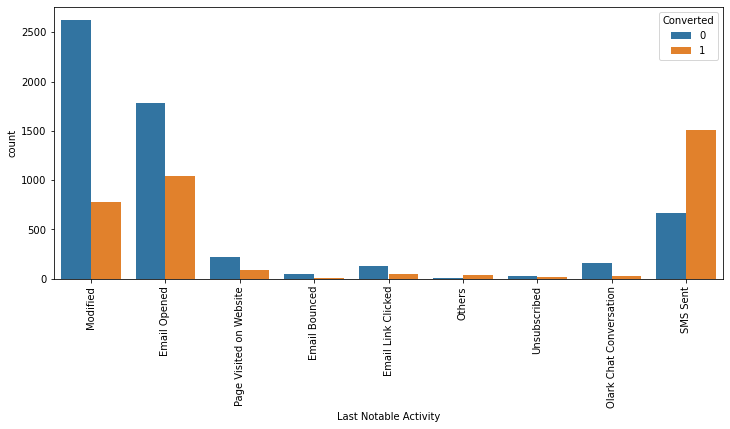

In [40]:
# clustering low valued categories into a single category 'Others'
df['Last Notable Activity']=df['Last Notable Activity'].replace(['Resubscribed to emails','View in browser link Clicked',
                                                                 'Approached upfront','Form Submitted on Website','Email Received'
                                                                 ,'Email Marked Spam','Had a Phone Conversation','Unreachable'],
                                                                'Others')
# re-plotting
plt.figure(figsize=(12,5))
sns.countplot('Last Notable Activity', hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

- 'SMS Sent' has as very high Conversion ratio and should be emphasized more upon.

##### EDA - Conclusion: 
- Dropped columns (14) (due to high skewnesstowards one specific category) : 'Do Not Call', 'Country', 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
- Clustered insignificant labels under a single label ('Others') within couple of columns
- Derived some proportional and relevant inference to be emphasised upon.

### Data Cleaning

In [41]:
# Column 'Lead Number' is not required and can be dropped

df.drop('Lead Number',axis=1,inplace=True)

In [42]:
# many columns have level as 'Select' which can be changed to 'Nan'. (Identified columns: 'Lead Profile', 'How did you hear about X Education', 'Specialization')
df.replace('Select',np.nan,inplace=True)

In [43]:
# verifying
df.head(3)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened


In [44]:
# % missing values for each attribute
(df.isnull().sum() / len(df))*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Tags                                      36.287879
Lead Quality                              51.590909
Lead Profile                              74.188312
City                                      39.707792
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique

In [45]:
df.shape

(9240, 22)

- There are 15 columns with missing values ranging from 0.389% to 78.46%.
- We will drop the columns that are having more than 50% of missnig data.
- Will review rest of the columns to take appropriate decision on action over them.

###### Dropping 3 columns haing more than 50% missing values 
- How did you hear about X Education (78.463203)
- Lead Quality (51.590909)
- Lead Profile (74.188312)

In [46]:
df = df.loc[:,df.isnull().sum()/len(df)*100 <50]
##OR
# drp_var = ['How did you hear about X Education','Lead Quality','Lead Profile']
# df.drop(drp_var,axis=1,inplace=True)

In [47]:
df.shape # 3 columns dropped

(9240, 19)

###### Will review following columns (8) to take appropriate decision on action over them.
- Specialization, What is your current occupation, Tags, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score

#### Asymmetrique Activity & Profile score (45.768 %)

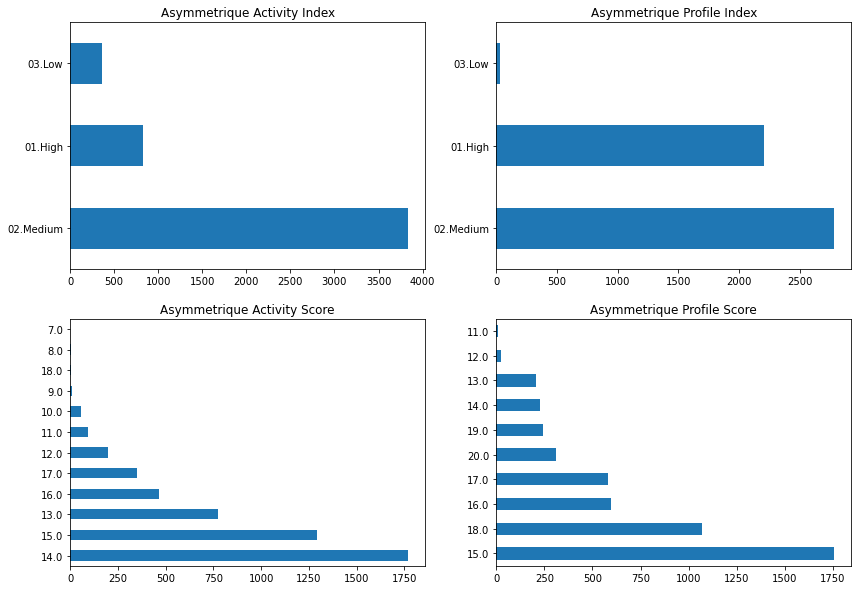

In [48]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.title('Asymmetrique Activity Index')
df['Asymmetrique Activity Index'].value_counts().plot(kind='barh')
plt.subplot(2,2,2)
plt.title('Asymmetrique Profile Index')
df['Asymmetrique Profile Index'].value_counts().plot(kind='barh')
plt.subplot(2,2,3)
plt.title('Asymmetrique Activity Score')
df['Asymmetrique Activity Score'].value_counts().plot(kind='barh')
plt.subplot(2,2,4)
plt.title('Asymmetrique Profile Score')
df['Asymmetrique Profile Score'].value_counts().plot(kind='barh')

plt.show()

 - Way too much missing data
 - There is too much of varrying data for these columns. Hence can't assume any single imputation for >45% nulls.

In [49]:
# Dropping Asymmetrique Index & Score columns based on above inference

drp_col = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df.drop(drp_col,axis=1,inplace=True)

In [50]:
# reviewing % missing values for each attribute

(df.isnull().sum() / len(df))*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [51]:
df.shape

(9240, 15)

#### City (39.707 %) : "The city of the customer."

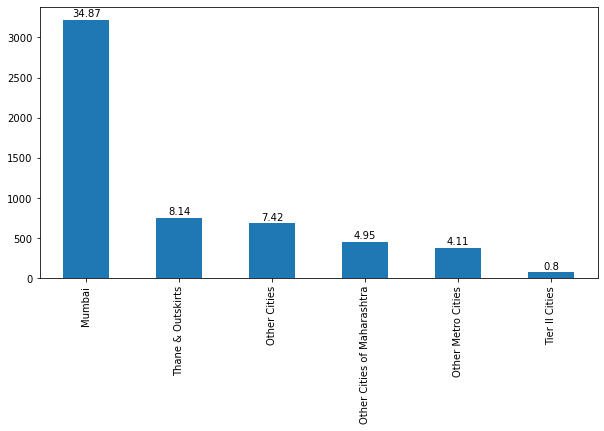

In [52]:
plt.figure(figsize=(10,5))
ax = df['City'].value_counts().plot(kind='bar')

# annotating percentage over bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x,y = p.get_xy()
    ax.annotate(round((height/len(df))*100,2), (x+width/2, y+height+40), ha ='center')
plt.show()

- 'Mumbai' shows significant majority and could be imputed to null values.
- However, doing so, the column 'City' will be skewed towards 'Mumbai' (~75%), which is not preferrable for the model. Hence, will drop the column due to persisting skewness.
- Also, X Education being an online coarse, the City or Country doesn't makes sense of conversion.

In [53]:
# dropping column 'City' due to pertaining skewness

df.drop('City',axis=1,inplace=True)

df.shape

(9240, 14)

In [54]:
# reviewing % missing values for each attribute

(df.isnull().sum() / len(df))*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

#### Tags (36.287 %) : "Tags assigned to customers indicating the current status of the lead."

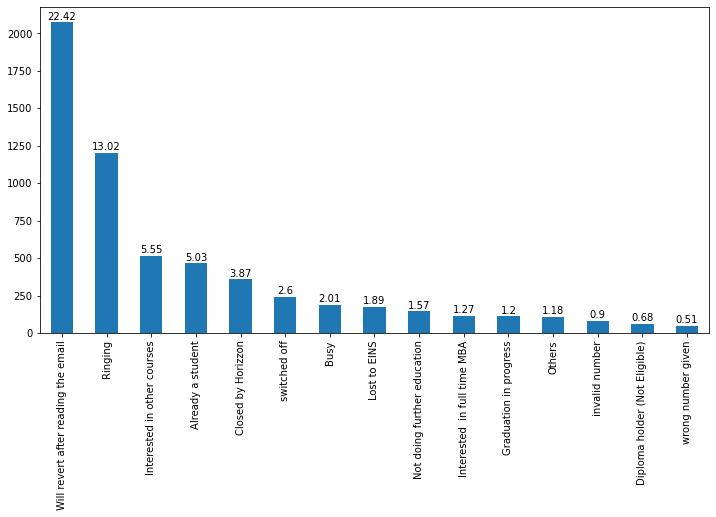

In [55]:
plt.figure(figsize=(12,6))
ax = df['Tags'].value_counts().plot(kind='bar')

# annotating percentage over bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x,y = p.get_xy()
    ax.annotate(round((height/len(df))*100,2), (x+width/2, y+height+20), ha ='center')
plt.show()

 - There is too much of diversity in data for this coulumn. Hence can't assume any single imputation for 36% + missing values which is huge. Also these are intution (of person that tags them) based hence it can be anything.

In [56]:
# Dropping 'Tags' column based on above inference

df.drop('Tags',axis=1,inplace=True)

In [57]:
# reviewing % missing values for each attribute

(df.isnull().sum() / len(df))*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [58]:
df.shape

(9240, 13)

#### "What is your current occupation" (29.112 %) : "Indicates whether the customer is a student, umemployed or employed"

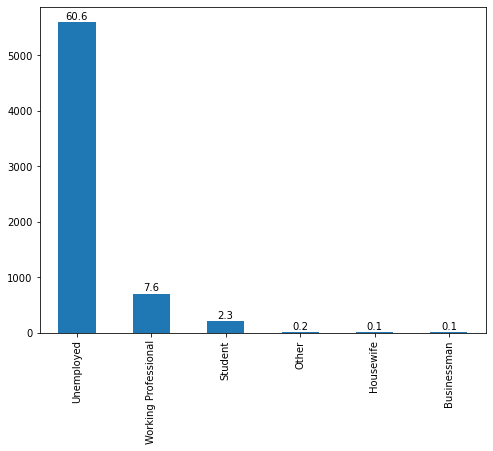

In [59]:
plt.figure(figsize=(8,6))
ax = df['What is your current occupation'].value_counts().plot(kind='bar')
# annotating values over bars
for p in ax.patches:
    height=p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate((round((100*height/len(df)),1)), (x + width/2,y+height+50), ha='center') # representing in percentage
plt.show()

- 'Unemployed' shows significant majority and could be imputed to null values.
- However, doing so, the feature  will be skewed towards 'Unemployed' (~90%), which is not preferrable for the model. Hence, it can be dropped the column due to persisting skewness.
- However again, we have dropped lot of features already,hence we may drop the null rows as we still have full and sufficient capacity of records to model upon.

In [60]:
# dropping null valued rows

df = df[df['What is your current occupation'].notnull()]

In [61]:
df.shape # dropped 2690 rows (~29%)

(6550, 13)

In [62]:
# reviewing % missing values for each attribute

(df.isnull().sum() / len(df))*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.549618
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.984733
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.984733
Last Activity                              1.572519
Specialization                            29.725191
What is your current occupation            0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [63]:
# droping rows where the columns are having less than 2% missing values

df = df[df['Lead Source'].notnull()]
df = df[df['TotalVisits'].notnull()]
df = df[df['Page Views Per Visit'].notnull()]
df = df[df['Last Activity'].notnull()]

## OR 
# df = df.dropna()

In [64]:
df.shape # 159 rows deleted

(6391, 13)

In [65]:
# re-checking

(df.isnull().sum() / len(df))*100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Specialization                            29.040839
What is your current occupation            0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

#### Specialization (29.04 %) : "The industry domain in which the customer worked before"

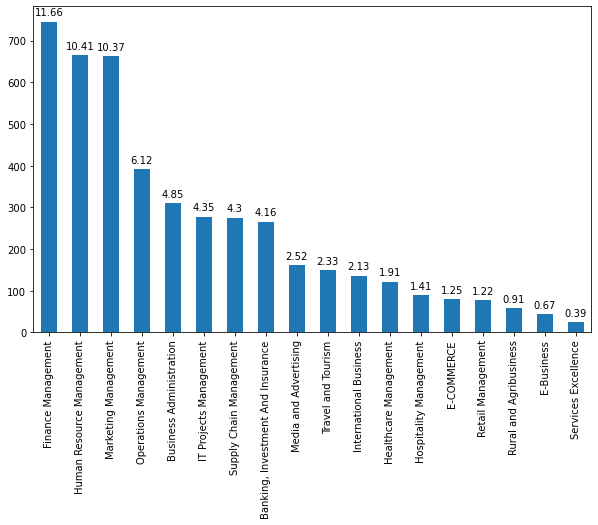

In [66]:
plt.figure(figsize=(10,6))
ax = df['Specialization'].value_counts().plot(kind='bar')

# annotating percentage over bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x,y = p.get_xy()
    ax.annotate(round((height/len(df))*100,2), (x+width/2, y+height+15), ha ='center')
plt.show()

- There is diversity in Specialization options, however none so signinficant that can be used to fill in nulls
- While there are various carreer specializations mentioned, and optional coategory is missing. We can impute Neither/Others to nulls.

In [67]:
# Imputing 'Others' as an optional category in place of null values.

df['Specialization'].replace(np.nan,'Others',inplace=True)

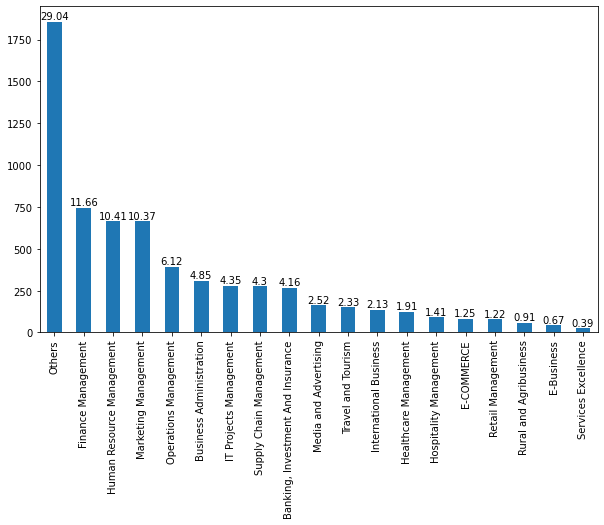

In [68]:
# reviewing actions made

plt.figure(figsize=(10,6))
ax = df['Specialization'].value_counts().plot(kind='bar')

# annotating percentage over bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x,y = p.get_xy()
    ax.annotate(round((height/len(df))*100,2), (x+width/2, y+height+15), ha ='center')
plt.show()

In [69]:
df.shape

(6391, 13)

##### Missing values treated. Conclusion: For 15 missng columns, we:
- Dropped (3) (due to >50% missing values) : How did you hear about X Education, Lead Quality, Lead Profile
- Dropped (6) (due to skewness, recorded by sales team, diversity in data) : Tags, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, City
- Dropped (29%) rows for 'What is your Current Occupation' to avoid too much loss of features.
- Dropped rows (for 4) (due to <2% missing values) : Lead Source, TotalVisits, Page Views Per Visit, Last Activity
- Imputed (1) (with 'Others') for 'Specialization'

In [70]:
# Reviewing all the columns of the data set

df.isnull().sum()/len(df)*100

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- No more missing values

In [71]:
df.shape

(6391, 13)

- We have ~70% data retained at end of data cleaning

### Data Preparation

In [72]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6391 non-null   object 
 1   Lead Origin                             6391 non-null   object 
 2   Lead Source                             6391 non-null   object 
 3   Do Not Email                            6391 non-null   object 
 4   Converted                               6391 non-null   int64  
 5   TotalVisits                             6391 non-null   float64
 6   Total Time Spent on Website             6391 non-null   int64  
 7   Page Views Per Visit                    6391 non-null   float64
 8   Last Activity                           6391 non-null   object 
 9   Specialization                          6391 non-null   object 
 10  What is your current occupation         6391 non-null   obje

In [74]:
df.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened


In [75]:
# Converting binary variables (Yes/No) to 0/1

var =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[var] = df[var].apply(binary_map)

In [76]:
df.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Email Opened


In [77]:
# one hot encoding to create dummy variables for categorical variables with multiple levels

dummy_var = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                               'Last Notable Activity']],drop_first=True)
dummy_var.head(2)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [78]:
# Adding these columns to main dataframe
df = pd.concat([df,dummy_var],axis=1)
df.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [79]:
df.shape

(6391, 66)

In [80]:
# Dropping main columns from main dataframe since we have already created their dummy variables

df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                               'Last Notable Activity'],axis=1,inplace=True)
df.head(2)

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [81]:
# dataframe shape
df.shape

(6391, 60)

### Dataset Train-Test Split

In [82]:
# feature variables (X)
X = df.drop(['Prospect ID','Converted'],axis=1)
X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [83]:
# target variable (y)
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# test train split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [85]:
# verifying
X_train.shape

(4473, 58)

In [86]:
X_test.shape

(1918, 58)

### Scaling

In [87]:
# scaling the numerical data

scaler = StandardScaler() # initialising

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
270,0,-1.117891,-0.940529,-1.263885,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4869,0,-0.469886,1.436378,-0.226883,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2912,0,-1.117891,-0.940529,-1.263885,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4634,0,-0.145884,1.758457,0.291618,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2337,0,0.178118,1.673889,-0.574279,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Model Building - We will use mixed approach i.e. RFE as well as manual

## 1

In [88]:
# Logistic regression model #1

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4415
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1953.7
Date:                Mon, 11 Jan 2021   Deviance:                       3907.3
Time:                        02:18:51   Pearson chi2:                 4.74e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.5384   2.68e+04      0.001      0.999   -5.24e+04    5.25e+04
Do Not Email                                            -1.3683      0.246     -5.561      0.000      -1.851      -0.886
TotalVisits                                              0.3927      0.063      6.250      0.000       0.270       0.516
Total Time Spent on Website                              1.1295      0.049     23.245      0.000       1.034       1.225
Page Views Per Visit                                    -0.3169      0.066     -4.804      0.000      -0.446      -0.188
A free copy of Mastering The Interview                  -0.1857      0.123     -1.512      0.131      -0.427       0.055
Lead Origin_Landing Page Submission                     -0.7566      0.155     -4.884      0.000      -1.060      -0.453
Lead Origin_Lead Add Form                                0.9254      1.153      0.803      0.422      -1.334       3.185
Lead Origin_Lead Import                                  0.6433      0.264      2.432      0.015       0.125       1.162
Lead Source_Facebook                                     0.6433      0.264      2.432      0.015       0.125       1.162
Lead Source_Google                                       0.2789      0.129      2.155      0.031       0.025       0.533
Lead Source_Olark Chat                                   1.5635      0.191      8.175      0.000       1.189       1.938
Lead Source_Organic Search                               0.1151      0.147      0.781      0.435      -0.174       0.404
Lead Source_Others                                       0.6218      1.047      0.594      0.552      -1.429       2.673
Lead Source_Reference                                    2.8398      1.182      2.403      0.016       0.524       5.156
Lead Source_Referral Sites                               0.3862      0.365      1.058      0.290      -0.329       1.102
Lead Source_Welingak Website                             4.7558      1.362      3.491      0.000       2.086       7.426
Lead Source_bing                                         0.8226      1.296      0.635      0.526      -1.718       3.363
Last Activity_Email Bounced                             -0.8659      0.711     -1.217      0.224      -2.260       0.528
Last Activity_Email Link Clicked                         0.6239      0.429      1.453      0.146      -0.218       1.466
Last Activity_Email Opened                               0.7042      0.267      2.636      0.008       0.181       1.228
Last Activity_Form Submitted on Website                  0.0591      0.438      0.135      0.893      -0.800       0.919
Last Activity_Olark Chat Conversation                   -0

### Feature selection using RFE

In [89]:
logreg = LogisticRegression() # initializing Logestic Regression

rfe = RFE(logreg,20) # seeking 20 best features by Recursive feature elimination
rfe = rfe.fit(X_train,y_train)

In [90]:
# selected features by RFE

rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False, False, False])

In [91]:
# details column wise

list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # rfe.ranking_ gives priority ranking to columns based on RFE

[('Do Not Email', True, 1),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 16),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 38),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website',

In [92]:
# storing rfe suggested preferred (top 20) columns in 'prf' variable.

prf = X_train.columns[rfe.support_]
prf

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others'],
      dtype='object')

In [93]:
# storing rfe suggested not preferred columns in 'n_prf' variable.

n_prf = X_train.columns[~rfe.support_]
n_prf

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites', 'Lead Source_bing',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_R

## 2

In [94]:
# Building Logistic regression model #2 with RFE suggested columns

X_train_sm = sm.add_constant(X_train[prf])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1996.4
Date:                Mon, 11 Jan 2021   Deviance:                       3992.8
Time:                        02:18:54   Pearson chi2:                 4.74e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6984      0.760      0.919      0.358      -0.791       2.187
Do Not Email                                            -1.5571      0.209     -7.439      0.000      -1.967      -1.147
Total Time Spent on Website                              1.1329      0.048     23.835      0.000       1.040       1.226
Lead Origin_Landing Page Submission                     -1.0169      0.143     -7.130      0.000      -1.296      -0.737
Lead Origin_Lead Add Form                                1.3044      0.935      1.395      0.163      -0.529       3.137
Lead Source_Facebook                                     0.9554      0.513      1.863      0.063      -0.050       1.961
Lead Source_Olark Chat                                   1.3065      0.144      9.088      0.000       1.025       1.588
Lead Source_Reference                                    2.2481      0.966      2.326      0.020       0.354       4.142
Lead Source_Welingak Website                             4.1645      1.180      3.528      0.000       1.851       6.478
Last Activity_Olark Chat Conversation                   -0.9288      0.194     -4.777      0.000      -1.310      -0.548
Last Activity_Others                                     0.7079      0.568      1.246      0.213      -0.406       1.821
Last Activity_SMS Sent                                   1.0185      0.086     11.819      0.000       0.850       1.187
Last Activity_Unsubscribed                               1.0328      0.556      1.858      0.063      -0.057       2.122
Specialization_Hospitality Management                   -1.0687      0.383     -2.792      0.005      -1.819      -0.318
Specialization_Others                                   -0.8864      0.138     -6.407      0.000      -1.158      -0.615
What is your current occupation_Housewife               22.4099   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
What is your current occupation_Student                 -0.5569      0.791     -0.704      0.482      -2.108       0.994
What is your current occupation_Unemployed              -0.5950      0.759     -0.784      0.433      -2.083       0.893
What is your current occupation_Working Professional     1.7341      0.779      2.226      0.026       0.207       3.261
Last Notable Activity_Modified                          -0.6951      0.094     -7.355      0.000      -0.880      -0.510
Last Notable Activity_Others                             3.0648      1.081      2.836      0.005       0.947       5.183
========================================================================================================================
"""

In [95]:
# Dropping column 'What is your current occupation_Housewife' as it has a high p-value of 0.999 (>>>0.05)

prf1 = prf.drop('What is your current occupation_Housewife')

In [96]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf1])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4453
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.8
Date:                Mon, 11 Jan 2021   Deviance:                       3997.6
Time:                        02:18:54   Pearson chi2:                 4.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5023      0.683      2.199      0.028       0.163       2.841
Do Not Email                                            -1.5664      0.210     -7.473      0.000      -1.977      -1.156
Total Time Spent on Website                              1.1307      0.047     23.812      0.000       1.038       1.224
Lead Origin_Landing Page Submission                     -1.0031      0.142     -7.045      0.000      -1.282      -0.724
Lead Origin_Lead Add Form                                1.3097      0.935      1.400      0.161      -0.523       3.143
Lead Source_Facebook                                     0.9613      0.513      1.875      0.061      -0.044       1.966
Lead Source_Olark Chat                                   1.3081      0.144      9.098      0.000       1.026       1.590
Lead Source_Reference                                    2.2511      0.966      2.329      0.020       0.357       4.145
Lead Source_Welingak Website                             4.1630      1.180      3.527      0.000       1.849       6.476
Last Activity_Olark Chat Conversation                   -0.9315      0.195     -4.785      0.000      -1.313      -0.550
Last Activity_Others                                     0.7084      0.568      1.248      0.212      -0.405       1.821
Last Activity_SMS Sent                                   1.0170      0.086     11.805      0.000       0.848       1.186
Last Activity_Unsubscribed                               1.0396      0.556      1.871      0.061      -0.050       2.129
Specialization_Hospitality Management                   -1.0668      0.383     -2.788      0.005      -1.817      -0.317
Specialization_Others                                   -0.8781      0.138     -6.354      0.000      -1.149      -0.607
What is your current occupation_Student                 -1.3707      0.713     -1.921      0.055      -2.769       0.028
What is your current occupation_Unemployed              -1.4086      0.678     -2.079      0.038      -2.737      -0.081
What is your current occupation_Working Professional     0.9200      0.700      1.315      0.188      -0.451       2.291
Last Notable Activity_Modified                          -0.6973      0.094     -7.385      0.000      -0.882      -0.512
Last Notable Activity_Others                             3.0638      1.080      2.836      0.005       0.946       5.181
========================================================================================================================
"""

In [97]:
# Dropping column 'Last Activity_Others' as it has a high p-value of 0.212 (>>>0.05)

prf2 = prf1.drop('Last Activity_Others')

In [98]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf2])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4454
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1999.6
Date:                Mon, 11 Jan 2021   Deviance:                       3999.1
Time:                        02:18:54   Pearson chi2:                 4.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4948      0.683      2.189      0.029       0.156       2.833
Do Not Email                                            -1.5684      0.210     -7.486      0.000      -1.979      -1.158
Total Time Spent on Website                              1.1313      0.047     23.832      0.000       1.038       1.224
Lead Origin_Landing Page Submission                     -1.0010      0.142     -7.030      0.000      -1.280      -0.722
Lead Origin_Lead Add Form                                1.3087      0.935      1.400      0.162      -0.524       3.141
Lead Source_Facebook                                     0.9588      0.513      1.870      0.061      -0.046       1.963
Lead Source_Olark Chat                                   1.3117      0.144      9.124      0.000       1.030       1.594
Lead Source_Reference                                    2.2543      0.966      2.334      0.020       0.361       4.148
Lead Source_Welingak Website                             4.1614      1.180      3.526      0.000       1.849       6.474
Last Activity_Olark Chat Conversation                   -0.9441      0.194     -4.857      0.000      -1.325      -0.563
Last Activity_SMS Sent                                   1.0137      0.086     11.773      0.000       0.845       1.182
Last Activity_Unsubscribed                               1.0378      0.556      1.868      0.062      -0.051       2.127
Specialization_Hospitality Management                   -1.0711      0.383     -2.798      0.005      -1.821      -0.321
Specialization_Others                                   -0.8753      0.138     -6.333      0.000      -1.146      -0.604
What is your current occupation_Student                 -1.3682      0.713     -1.919      0.055      -2.766       0.029
What is your current occupation_Unemployed              -1.4023      0.677     -2.071      0.038      -2.729      -0.075
What is your current occupation_Working Professional     0.9338      0.699      1.336      0.182      -0.437       2.304
Last Notable Activity_Modified                          -0.6847      0.094     -7.300      0.000      -0.869      -0.501
Last Notable Activity_Others                             3.4185      1.051      3.252      0.001       1.358       5.479
========================================================================================================================
"""

In [99]:
# Dropping column 'What is your current occupation_Working Professional' as it has a high p-value of 0.182 (>>>0.05)

prf3 = prf2.drop('What is your current occupation_Working Professional')

In [100]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf3])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4455
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.4
Date:                Mon, 11 Jan 2021   Deviance:                       4000.8
Time:                        02:18:54   Pearson chi2:                 4.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.3680      0.219     10.789      0.000       1.938       2.798
Do Not Email                                  -1.5729      0.210     -7.495      0.000      -1.984      -1.162
Total Time Spent on Website                    1.1308      0.047     23.825      0.000       1.038       1.224
Lead Origin_Landing Page Submission           -0.9945      0.142     -6.987      0.000      -1.273      -0.716
Lead Origin_Lead Add Form                      1.3119      0.935      1.403      0.161      -0.521       3.145
Lead Source_Facebook                           0.9645      0.512      1.884      0.060      -0.039       1.968
Lead Source_Olark Chat                         1.3148      0.144      9.144      0.000       1.033       1.597
Lead Source_Reference                          2.2551      0.966      2.334      0.020       0.361       4.149
Lead Source_Welingak Website                   4.1612      1.180      3.526      0.000       1.848       6.474
Last Activity_Olark Chat Conversation         -0.9432      0.195     -4.849      0.000      -1.325      -0.562
Last Activity_SMS Sent                         1.0160      0.086     11.809      0.000       0.847       1.185
Last Activity_Unsubscribed                     1.0459      0.555      1.885      0.059      -0.042       2.133
Specialization_Hospitality Management         -1.0588      0.382     -2.774      0.006      -1.807      -0.311
Specialization_Others                         -0.8718      0.138     -6.307      0.000      -1.143      -0.601
What is your current occupation_Student       -2.2471      0.288     -7.803      0.000      -2.812      -1.683
What is your current occupation_Unemployed    -2.2814      0.181    -12.594      0.000      -2.636      -1.926
Last Notable Activity_Modified                -0.6869      0.094     -7.324      0.000      -0.871      -0.503
Last Notable Activity_Others                   3.4212      1.051      3.255      0.001       1.361       5.481
==============================================================================================================
"""

In [101]:
# Dropping column 'Lead Origin_Lead Add Form' as it has a high p-value of 0.161 (>>>0.05)

prf4 = prf3.drop('Lead Origin_Lead Add Form')

In [102]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf4])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4456
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.4
Date:                Mon, 11 Jan 2021   Deviance:                       4002.9
Time:                        02:18:54   Pearson chi2:                 4.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.3849      0.219     10.871      0.000       1.955       2.815
Do Not Email                                  -1.5739      0.210     -7.501      0.000      -1.985      -1.163
Total Time Spent on Website                    1.1280      0.047     23.800      0.000       1.035       1.221
Lead Origin_Landing Page Submission           -1.0127      0.142     -7.136      0.000      -1.291      -0.735
Lead Source_Facebook                           0.9464      0.512      1.848      0.065      -0.057       1.950
Lead Source_Olark Chat                         1.3048      0.144      9.092      0.000       1.023       1.586
Lead Source_Reference                          3.5505      0.285     12.464      0.000       2.992       4.109
Lead Source_Welingak Website                   5.4616      0.731      7.470      0.000       4.029       6.895
Last Activity_Olark Chat Conversation         -0.9472      0.195     -4.869      0.000      -1.328      -0.566
Last Activity_SMS Sent                         1.0162      0.086     11.813      0.000       0.848       1.185
Last Activity_Unsubscribed                     1.0438      0.555      1.882      0.060      -0.043       2.131
Specialization_Hospitality Management         -1.0611      0.382     -2.780      0.005      -1.809      -0.313
Specialization_Others                         -0.8827      0.138     -6.392      0.000      -1.153      -0.612
What is your current occupation_Student       -2.2453      0.288     -7.796      0.000      -2.810      -1.681
What is your current occupation_Unemployed    -2.2784      0.181    -12.576      0.000      -2.634      -1.923
Last Notable Activity_Modified                -0.6880      0.094     -7.338      0.000      -0.872      -0.504
Last Notable Activity_Others                   3.4146      1.051      3.249      0.001       1.355       5.474
==============================================================================================================
"""

In [103]:
# Dropping column 'Lead Source_Facebook' as it has a high p-value of 0.065 (>>>0.05)

prf5 = prf4.drop('Lead Source_Facebook')

In [104]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf5])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2003.1
Date:                Mon, 11 Jan 2021   Deviance:                       4006.1
Time:                        02:18:54   Pearson chi2:                 4.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.4306      0.218     11.145      0.000       2.003       2.858
Do Not Email                                  -1.5753      0.210     -7.513      0.000      -1.986      -1.164
Total Time Spent on Website                    1.1191      0.047     23.784      0.000       1.027       1.211
Lead Origin_Landing Page Submission           -1.0574      0.140     -7.541      0.000      -1.332      -0.783
Lead Source_Olark Chat                         1.2720      0.142      8.943      0.000       0.993       1.551
Lead Source_Reference                          3.5066      0.284     12.357      0.000       2.950       4.063
Lead Source_Welingak Website                   5.4313      0.731      7.430      0.000       3.999       6.864
Last Activity_Olark Chat Conversation         -0.9559      0.195     -4.913      0.000      -1.337      -0.575
Last Activity_SMS Sent                         1.0159      0.086     11.812      0.000       0.847       1.184
Last Activity_Unsubscribed                     1.0383      0.554      1.875      0.061      -0.047       2.124
Specialization_Hospitality Management         -1.0432      0.384     -2.720      0.007      -1.795      -0.291
Specialization_Others                         -0.9095      0.138     -6.600      0.000      -1.180      -0.639
What is your current occupation_Student       -2.2448      0.288     -7.794      0.000      -2.809      -1.680
What is your current occupation_Unemployed    -2.2768      0.181    -12.573      0.000      -2.632      -1.922
Last Notable Activity_Modified                -0.6858      0.094     -7.317      0.000      -0.869      -0.502
Last Notable Activity_Others                   3.3997      1.051      3.235      0.001       1.340       5.460
==============================================================================================================
"""

In [105]:
# Dropping column 'Last Activity_Unsubscribed' as it has a high p-value of 0.061 (>0.05)

prf6 = prf5.drop('Last Activity_Unsubscribed')

In [106]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf6])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.6
Date:                Mon, 11 Jan 2021   Deviance:                       4009.3
Time:                        02:18:54   Pearson chi2:                 4.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.4416      0.218     11.198      0.000       2.014       2.869
Do Not Email                                  -1.4654      0.197     -7.431      0.000      -1.852      -1.079
Total Time Spent on Website                    1.1186      0.047     23.796      0.000       1.026       1.211
Lead Origin_Landing Page Submission           -1.0600      0.140     -7.557      0.000      -1.335      -0.785
Lead Source_Olark Chat                         1.2732      0.142      8.949      0.000       0.994       1.552
Lead Source_Reference                          3.4936      0.283     12.337      0.000       2.939       4.049
Lead Source_Welingak Website                   5.4031      0.730      7.403      0.000       3.973       6.834
Last Activity_Olark Chat Conversation         -0.9597      0.195     -4.934      0.000      -1.341      -0.578
Last Activity_SMS Sent                         1.0042      0.086     11.723      0.000       0.836       1.172
Specialization_Hospitality Management         -1.0182      0.381     -2.671      0.008      -1.765      -0.271
Specialization_Others                         -0.9110      0.138     -6.613      0.000      -1.181      -0.641
What is your current occupation_Student       -2.2535      0.288     -7.834      0.000      -2.817      -1.690
What is your current occupation_Unemployed    -2.2797      0.181    -12.598      0.000      -2.634      -1.925
Last Notable Activity_Modified                -0.6913      0.094     -7.384      0.000      -0.875      -0.508
Last Notable Activity_Others                   3.3892      1.051      3.224      0.001       1.329       5.450
==============================================================================================================
"""

- p-values for all columns now look ok (within range of ~0.05)

##### Predicting y_train

In [107]:
# predicting y_train (y_train_pred) for finalized X_train

y_train_pred = res.predict(X_train_sm)
y_train_pred[:5] # probability based on deveopd model

270     0.992483
4869    0.952045
2912    0.800145
4634    0.593309
2337    0.893549
dtype: float64

In [108]:
# converting it to series format so as to pitch it into our dataframe

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.99248326, 0.95204509, 0.80014505, 0.59330889, 0.8935486 ])

In [109]:
# creating a dataframe with Actual Converted values and predicted probablities

y_train_pred_fin = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_fin['Prospect ID'] = y_train.index
y_train_pred_fin.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.992483,270
1,1,0.952045,4869
2,1,0.800145,2912
3,1,0.593309,4634
4,1,0.893549,2337


In [110]:
# creating another conversion prediction column 'Converted_Pred' based on probablity threshold of >0.5

y_train_pred_fin['Converted_Pred']=y_train_pred_fin['Converted_Prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_fin.head()

,Converted,Converted_Prob,Prospect ID,Converted_Pred
0,1,0.992483,270,1
1,1,0.952045,4869,1
2,1,0.800145,2912,1
3,1,0.593309,4634,1
4,1,0.893549,2337,1


### Confusion Matrix

In [111]:
# creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Converted_Pred)

In [112]:
print(confusion)

[[2000  366]
 [ 549 1558]]


In [113]:
# overall model accuracy
print(metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Converted_Pred))

0.795439302481556


### VIF

In [114]:
# VIF (variance inflation factor)
# creatnig Dataframe with all finalized variables and their VIF score

vif = pd.DataFrame()
vif['features'] = X_train[prf6].columns
vif['VIF'] = [variance_inflation_factor(X_train[prf6].values, i) for i in range(X_train[prf6].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
11,What is your current occupation_Unemployed,6.26
2,Lead Origin_Landing Page Submission,4.41
9,Specialization_Others,2.84
3,Lead Source_Olark Chat,1.74
12,Last Notable Activity_Modified,1.68
7,Last Activity_SMS Sent,1.61
6,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.26
4,Lead Source_Reference,1.26
10,What is your current occupation_Student,1.25


In [115]:
# drop column 'What is your current occupation_Unemployed' from model variables due to high VIF (6.26) (>5)

prf7 = prf6.drop('What is your current occupation_Unemployed')

## 3

In [116]:
# running the model again (model 3)

X_train_sm = sm.add_constant(X_train[prf7])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.7
Date:                Mon, 11 Jan 2021   Deviance:                       4221.3
Time:                        02:18:55   Pearson chi2:                 4.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.4948      0.134      3.698      0.000       0.233       0.757
Do Not Email                               -1.4432      0.187     -7.717      0.000      -1.810      -1.077
Total Time Spent on Website                 1.1337      0.046     24.647      0.000       1.044       1.224
Lead Origin_Landing Page Submission        -1.1937      0.136     -8.780      0.000      -1.460      -0.927
Lead Source_Olark Chat                      1.2810      0.140      9.161      0.000       1.007       1.555
Lead Source_Reference                       3.5618      0.278     12.807      0.000       3.017       4.107
Lead Source_Welingak Website                5.3541      0.730      7.338      0.000       3.924       6.784
Last Activity_Olark Chat Conversation      -0.9598      0.188     -5.093      0.000      -1.329      -0.590
Last Activity_SMS Sent                      0.9914      0.083     11.906      0.000       0.828       1.155
Specialization_Hospitality Management      -0.6913      0.359     -1.925      0.054      -1.395       0.012
Specialization_Others                      -1.2043      0.135     -8.919      0.000      -1.469      -0.940
What is your current occupation_Student    -0.1418      0.233     -0.608      0.543      -0.599       0.316
Last Notable Activity_Modified             -0.6638      0.091     -7.303      0.000      -0.842      -0.486
Last Notable Activity_Others                3.3818      1.045      3.237      0.001       1.334       5.429
===========================================================================================================
"""

In [117]:
# drop column 'What is your current occupation_Student' due to higher p-value (0.543) (>>>0.05)

prf8 = prf7.drop('What is your current occupation_Student')

In [118]:
# running the model again

X_train_sm = sm.add_constant(X_train[prf8])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.9
Date:                Mon, 11 Jan 2021   Deviance:                       4221.7
Time:                        02:18:55   Pearson chi2:                 4.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4934      0.134      3.688      0.000       0.231       0.756
Do Not Email                             -1.4434      0.187     -7.720      0.000      -1.810      -1.077
Total Time Spent on Website               1.1332      0.046     24.645      0.000       1.043       1.223
Lead Origin_Landing Page Submission      -1.1970      0.136     -8.811      0.000      -1.463      -0.931
Lead Source_Olark Chat                    1.2760      0.140      9.142      0.000       1.002       1.550
Lead Source_Reference                     3.5565      0.278     12.793      0.000       3.012       4.101
Lead Source_Welingak Website              5.3550      0.730      7.339      0.000       3.925       6.785
Last Activity_Olark Chat Conversation    -0.9629      0.188     -5.111      0.000      -1.332      -0.594
Last Activity_SMS Sent                    0.9947      0.083     11.966      0.000       0.832       1.158
Specialization_Hospitality Management    -0.6931      0.359     -1.932      0.053      -1.396       0.010
Specialization_Others                    -1.2066      0.135     -8.942      0.000      -1.471      -0.942
Last Notable Activity_Modified           -0.6632      0.091     -7.299      0.000      -0.841      -0.485
Last Notable Activity_Others              3.3858      1.045      3.241      0.001       1.339       5.433
=========================================================================================================
"""

- The varibale p-values are good (~0.05)

##### predicting y_train (2)

In [119]:
# predicting new/updated y_train (y_train_pred) for updated X_train & reshaping it to series

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred[:5]

array([0.95185016, 0.71585975, 0.84530418, 0.65152312, 0.89827873])

In [120]:
# placing in Dataframe

y_train_pred_fin['Converted_Prob'] = y_train_pred

In [121]:
# creating new/updated conversion prediction column 'Converted_Pred' based on probablity threshold of >0.5

y_train_pred_fin['Converted_Pred'] = y_train_pred_fin['Converted_Prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_fin.head()

,Converted,Converted_Prob,Prospect ID,Converted_Pred
0,1,0.951850,270,1
1,1,0.715860,4869,1
2,1,0.845304,2912,1
3,1,0.651523,4634,1
4,1,0.898279,2337,1


#### Accuracy

In [122]:
print(metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Converted_Pred))

0.7856025039123631


- Overall accuracy remains similar and is GOOD

In [123]:
# checking VIF (variance inflation factor) again
# creating Dataframe with all finalized variables and their VIF score

vif = pd.DataFrame()
vif['features'] = X_train[prf8].columns
vif['VIF'] = [variance_inflation_factor(X_train[prf8].values, i) for i in range(X_train[prf8].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,features,VIF
9,Specialization_Others,1.81
2,Lead Origin_Landing Page Submission,1.70
3,Lead Source_Olark Chat,1.63
10,Last Notable Activity_Modified,1.63
7,Last Activity_SMS Sent,1.58
6,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.25
4,Lead Source_Reference,1.19
0,Do Not Email,1.11
5,Lead Source_Welingak Website,1.11


- VIF is well below the threshold (5) for all varibales, so no need to drop any more variables.

### Confusion Matrix (2)

In [124]:
# creating confusion matrix for updated model

confusion2 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Converted_Pred)
print(confusion2)

[[1968  398]
 [ 561 1546]]


### Metrics besides accuracy

In [125]:
# terms from confusion matrix

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Precision : Probability that a perdicted 'Yes' is actually a 'Yes' 

In [126]:
print(TP/(TP+FP))

0.7952674897119342


#### Recall/ Sensitivity : Probabilty that a actual 'Yes' case is predicted as 'Yes' correctly

In [127]:
print(TP/(TP+FN))

0.7337446606549597


In [128]:
# specificity
print(TN /(TN+FP))

0.8317836010143702


In [129]:
# False postive rate - (predicting conversion when customer did not convert)
print(FP/(TN+FP))

0.16821639898562976


In [130]:
# positive predictive value 
print (TP /(TP+FP))

0.7952674897119342


In [131]:
# Negative predictive value
print (TN /(TN+FN))

0.7781731909845789


### ROC Curve
- Represents Tradeoff between TPR & FPR i.e the Sensitivity and Specificity. they follow a inverse relation as FPR = 1-Specificity
- the closer te curve to the top left corner, greater area occupied by it , better the model.

In [132]:
# Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim((0.0, 1.0))
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_fin.Converted, y_train_pred_fin.Converted_Prob, drop_intermediate = False)


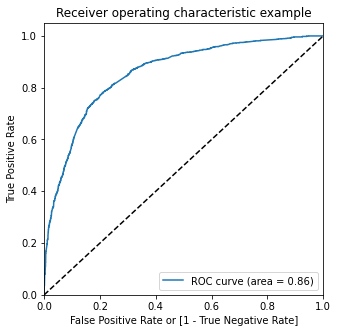

In [134]:
draw_roc(y_train_pred_fin.Converted, y_train_pred_fin.Converted_Prob)

- Area under the curve (AUC) is 0.86 (very close to 1)

### Optimal cuttoff point
- The probability at which we achive balanced sensitivy and specificity

In [135]:
# Adding prediction columns for all possible probability cutoffs i.e. 0.1, 0.2, 0.3, 0.4,..0.9

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_fin[i]= y_train_pred_fin.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_fin.head()

,Converted,Converted_Prob,Prospect ID,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.951850,270,1,1,1,1,1,1,1,1,1,1,1
1,1,0.715860,4869,1,1,1,1,1,1,1,1,1,0,0
2,1,0.845304,2912,1,1,1,1,1,1,1,1,1,1,0
3,1,0.651523,4634,1,1,1,1,1,1,1,1,0,0,0
4,1,0.898279,2337,1,1,1,1,1,1,1,1,1,1,0


In [136]:
# Create a Dataframe with probability, accuracy, sensitivity and specificity for all the above probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

#[1,1] # true positive 
#[0,0] # true negatives
#[0,1] # false positives
#[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.471049  1.000000  0.000000
0.1   0.1  0.547284  0.988609  0.154269
0.2   0.2  0.692153  0.938301  0.472950
0.3   0.3  0.759669  0.891789  0.642012
0.4   0.4  0.780013  0.802563  0.759932
0.5   0.5  0.785603  0.733745  0.831784
0.6   0.6  0.770177  0.652112  0.875317
0.7   0.7  0.734630  0.532985  0.914201
0.8   0.8  0.698413  0.417181  0.948859
0.9   0.9  0.642969  0.259611  0.984362


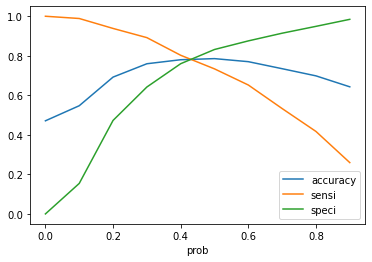

In [137]:
# Accuracy, sensitivity and specificity plot for all the probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.4 seems to be the optimum (balance between sensitivity & specificity) point to take it as a cutoff probability

In [138]:
y_train_pred_fin['Conv_Pred_Final'] = y_train_pred_fin.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_fin.head()

,Converted,Converted_Prob,Prospect ID,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Conv_Pred_Final
0,1,0.951850,270,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.715860,4869,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.845304,2912,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.651523,4634,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.898279,2337,1,1,1,1,1,1,1,1,1,1,0,1


##### Let's check the overall 'Accuracy'

In [139]:
print(metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Conv_Pred_Final))

0.7800134138162307


#### Confusion Matrix (3)

In [140]:
confusion3 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Conv_Pred_Final )
print(confusion3)

[[1798  568]
 [ 416 1691]]


In [141]:
# terms from confusion matrix

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

#### Precision : Probability that a perdicted 'Yes' is actually a 'Yes' 

In [142]:
print(TP/(TP+FP))

0.7485613103142984


#### Recall/ Sensitivity : Probabilty that a actual 'Yes' case is predicted as 'Yes' correctly

In [143]:
print(TP/(TP+FN))

0.8025628856193641


In [144]:
# specificity
print(TN /(TN+FP))

0.7599323753169906


In [145]:
# False postive rate - (predicting conversion when customer did not convert)
print(FP/(TN+FP))

0.2400676246830093


In [146]:
# positive predictive value 
print (TP /(TP+FP))

0.7485613103142984


In [147]:
# Negative predictive value
print (TN /(TN+FN))

0.8121047877145439


### Test Set Predictions

In [148]:
# scaling the same numerical data numerical data as for train set - **only transform**

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [149]:
X_test = X_test[prf8]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Last Notable Activity_Modified,Last Notable Activity_Others
594,0,-0.940529,0,0,0,0,0,0,0,1,0,0
101,0,-0.940529,0,1,0,0,0,0,0,1,1,0
8123,0,2.228081,0,0,0,0,0,1,0,1,0,0
2661,0,-0.940529,0,0,1,0,0,1,0,0,0,0
5666,1,0.525920,1,0,0,0,0,1,0,0,0,0


In [150]:
# adding constant term to test set

X_test_sm = sm.add_constant(X_test)

##### Predicting y_test

In [151]:
y_test_pred = res.predict(X_test_sm)

In [152]:
y_test_pred[:5]

594     0.144426
101     0.237537
8123    0.943012
2661    0.981634
5666    0.364378
dtype: float64

In [153]:
# Converting to series to pitch it into dataframe

y_test_pred = y_test_pred.values.reshape(-1)

y_test_pred

array([0.14442598, 0.23753663, 0.94301218, ..., 0.89974768, 0.86181888,
       0.98163441])

In [154]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [155]:
# Adding 'Prospect ID' to y_test_df

y_test_df['Prospect ID'] = y_test_df.index

y_test_df

,Converted,Prospect ID
594,0,594
101,1,101
8123,1,8123
2661,1,2661
5666,1,5666
...,...,...
6484,1,6484
8146,1,8146
4360,1,4360
7981,1,7981


In [156]:
# now adding 'y_test_pred' to the 'y_test_df' dataframe

y_test_df['Converted_Prob'] = y_test_pred

y_test_df

,Converted,Prospect ID,Converted_Prob
594,0,594,0.144426
101,1,101,0.237537
8123,1,8123,0.943012
2661,1,2661,0.981634
5666,1,5666,0.364378
...,...,...,...
6484,1,6484,0.582917
8146,1,8146,0.949797
4360,1,4360,0.899748
7981,1,7981,0.861819


In [157]:
# Removing index for dataframe

y_test_df.reset_index(drop=True, inplace=True)

y_test_df.head()

,Converted,Prospect ID,Converted_Prob
0,0,594,0.144426
1,1,101,0.237537
2,1,8123,0.943012
3,1,2661,0.981634
4,1,5666,0.364378


In [158]:
# Rearranging the columns

y_test_df = y_test_df.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_test_df.head()

,Prospect ID,Converted,Converted_Prob
0,594,0,0.144426
1,101,1,0.237537
2,8123,1,0.943012
3,2661,1,0.981634
4,5666,1,0.364378


In [159]:
# creating another conversion prediction column 'Converted_Pred' based on probablity threshold of >0.4 (derived from ROC curve)

y_test_df['Conv_Pred_Final'] = y_test_df.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_test_df.head()

,Prospect ID,Converted,Converted_Prob,Conv_Pred_Final
0,594,0,0.144426,0
1,101,1,0.237537,0
2,8123,1,0.943012,1
3,2661,1,0.981634,1
4,5666,1,0.364378,0


##### Let's check the overall 'Accuracy'

In [160]:
print(metrics.accuracy_score(y_test_df.Converted, y_test_df.Conv_Pred_Final))

0.7705943691345151


- 77.06% as against 78% in train set

#### Confusion Matrix (4 - Test)

In [161]:
confusion4 = metrics.confusion_matrix(y_test_df.Converted, y_test_df.Conv_Pred_Final)
print(confusion4)

[[688 272]
 [168 790]]


In [162]:
# terms from confusion matrix

TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

#### Precision : Probability that a perdicted 'Yes' is actually a 'Yes' 

In [163]:
print(TP/(TP+FP)*100)

74.3879472693032


- as against 74.85% in train set

#### Recall/ Sensitivity : Probabilty that a actual 'Yes' case is predicted as 'Yes' correctly

In [164]:
print(TP/(TP+FN)*100)

82.4634655532359


- as against 80.25 in train set

In [165]:
# specificity
print(TN /(TN+FP)*100)

71.66666666666667


- as against 75.99 in train set

In [166]:
# False postive rate - (predicting conversion when customer did not convert)
print(FP/(TN+FP)*100)

28.333333333333332


- as against 24.00 in train set

In [167]:
# positive predictive value 
print (TP /(TP+FP)*100)

74.3879472693032


- as against 74.85 in train set

In [168]:
# Negative predictive value
print (TN /(TN+FN)*100)

80.37383177570094


- as against 81.21 in train set

## Lead Score

In [169]:
y_test_df['Lead Score']=y_test_df['Converted_Prob'].apply(lambda x: int(x*100))

y_test_df

,Prospect ID,Converted,Converted_Prob,Conv_Pred_Final,Lead Score
0,594,0,0.144426,0,14
1,101,1,0.237537,0,23
2,8123,1,0.943012,1,94
3,2661,1,0.981634,1,98
4,5666,1,0.364378,0,36
...,...,...,...,...,...
1913,6484,1,0.582917,1,58
1914,8146,1,0.949797,1,94
1915,4360,1,0.899748,1,89
1916,7981,1,0.861819,1,86


##### Lead score is a score assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance